# Clustering Countries for HELP International

Import the required libraries

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

Import the required data

In [40]:
countries_df = pd.read_csv("Country-data.csv", index_col=False)
countries_df.head(10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [39]:
otherfile_df = pd.read_csv("data-dictionary.csv",index_col=False)
otherfile_df.head(10)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


### Data preprocessing

In [41]:
print('Original number of records in the dataset: ', len(countries_df))

Original number of records in the dataset:  167


In [42]:
countries_df.dropna
countries_df.drop_duplicates
print('Left number of records in the dataset: ', len(countries_df))

Left number of records in the dataset:  167


Features scaling

In [43]:
features = countries_df.drop('country', axis = 1)
scaler = StandardScaler()
features = scaler.fit_transform(features)

### K-means clustering

In [44]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
countries_df['cluster'] = kmeans.fit_predict(features)

#Add cluster labels to the original data
countries_df['cluster'] = kmeans.labels_
countries_df.head()

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


Plot the clusters

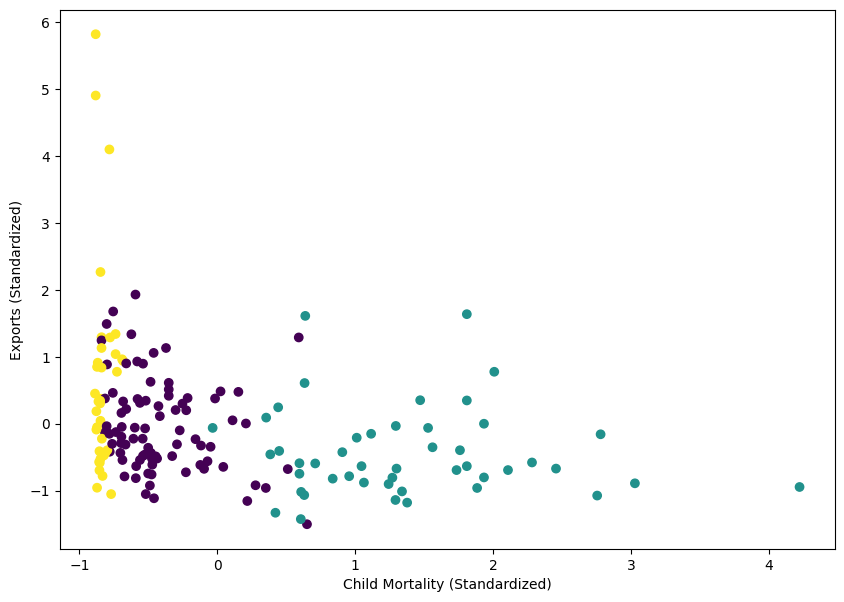

In [45]:
plt.figure(figsize=(10, 7))
plt.scatter(features[:, 0], features[:, 1], c=countries_df['cluster'], cmap='viridis')
# plt.title('K-means Clustering')
plt.xlabel('Child Mortality (Standardized)')
plt.ylabel('Exports (Standardized)')
plt.show()

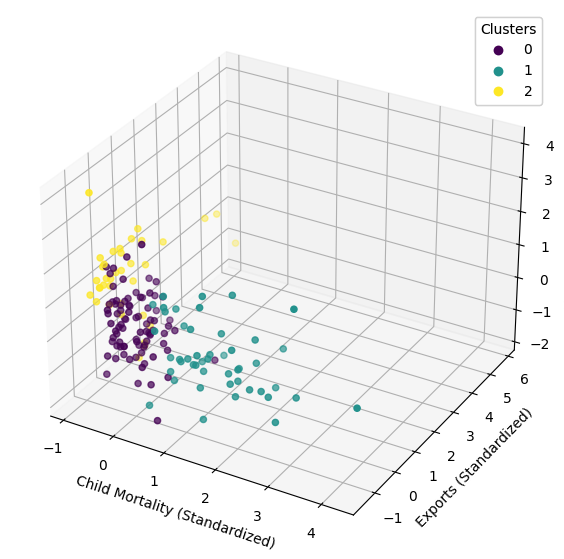

In [46]:
# Plot the clusters in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(features[:, 0], features[:, 1], features[:, 2], c=countries_df['cluster'], cmap='viridis')

# Adding labels
ax.set_xlabel('Child Mortality (Standardized)')
ax.set_ylabel('Exports (Standardized)')
ax.set_zlabel('Health (Standardized)')
#ax.set_title('3D K-means Clustering')

# Adding legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

### Agglomerative clustering

In [47]:
agglom = AgglomerativeClustering(n_clusters=3)
countries_df['cluster_agglom'] = agglom.fit_predict(features)

Create dendrogram

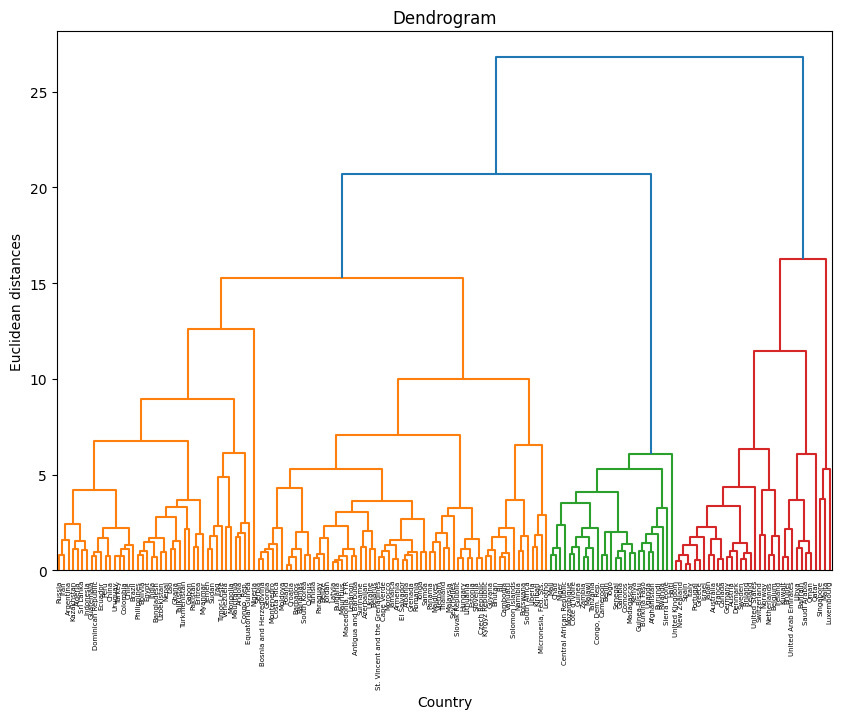

In [48]:
linked = linkage(features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=countries_df['country'].values, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Country')
plt.ylabel('Euclidean distances')
plt.show()

Plot the clusters

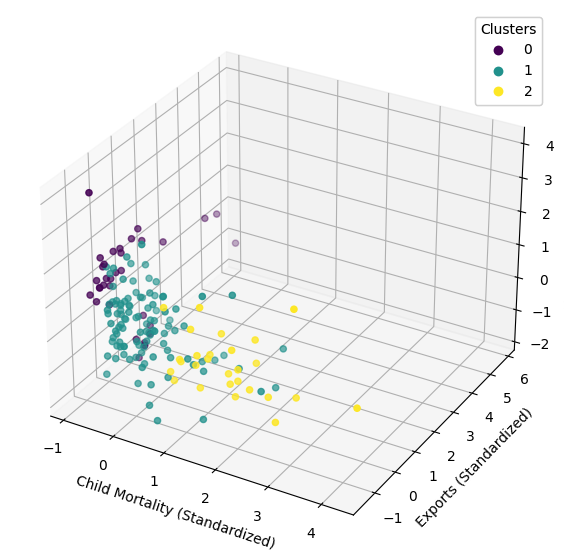

In [49]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(features[:, 0], features[:, 1], features[:, 2], c=countries_df['cluster_agglom'], cmap='viridis')

# Adding labels
ax.set_xlabel('Child Mortality (Standardized)')
ax.set_ylabel('Exports (Standardized)')
ax.set_zlabel('Health (Standardized)')
# ax.set_title('3D Agglomerative Clustering')

# Adding legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

### GMM Clustering

In [50]:
gmm = GaussianMixture(n_components=3, random_state=0)
countries_df['cluster_gmm'] = gmm.fit_predict(features)

Plot the clusters

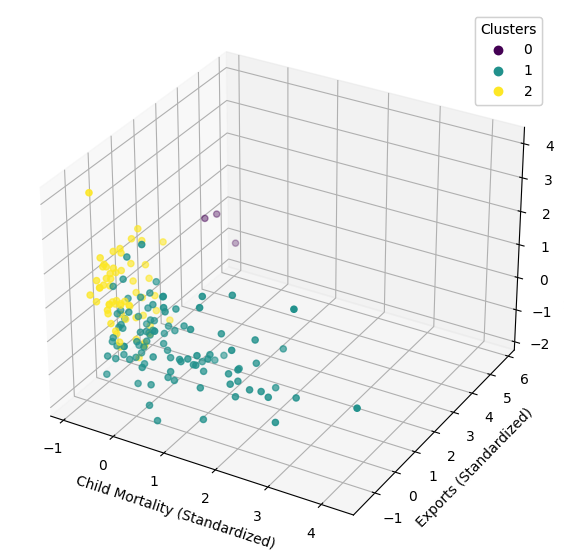

In [51]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(features[:, 0], features[:, 1], features[:, 2], c=countries_df['cluster_gmm'], cmap='viridis')

# Adding labels
ax.set_xlabel('Child Mortality (Standardized)')
ax.set_ylabel('Exports (Standardized)')
ax.set_zlabel('Health (Standardized)')
# ax.set_title('3D Gaussian Mixture Model Clustering')

# Adding legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

### Performances comparison

Calculate Silhouette Score for each model

In [52]:
kmeans_labels = kmeans.fit_predict(features)
agglom_labels = agglom.fit_predict(features)
gmm_labels = gmm.fit_predict(features)


kmeans_silhouette = silhouette_score(features, kmeans_labels)
agglom_silhouette = silhouette_score(features, agglom_labels)
gmm_silhouette = silhouette_score(features, gmm_labels)

# Display the results
print(f"K-means Silhouette Score: {kmeans_silhouette}")
print(f"Agglomerative Clustering Silhouette Score: {agglom_silhouette}")
print(f"GMM Silhouette Score: {gmm_silhouette}")


K-means Silhouette Score: 0.28329575683463126
Agglomerative Clustering Silhouette Score: 0.24563001303300652
GMM Silhouette Score: 0.2508131019360244


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
